# Atividade desenvolvida no curso de Introdução a Machine Learning com Scikit-learn

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz


# import para poder abrir o grafico do graphviz no jupyter notebook (Windows)
import os
os.environ["PATH"] += os.pathsep + r'C:\Users\alber\Anaconda3\Library\bin\graphviz'

In [19]:
dados = pd.read_csv('https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv')

In [20]:
dados.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


## Limpeza dos dados

In [21]:
# Troca dos nomes para português
mapeamento = {
    'mileage_per_year': 'milhas_por_ano',
    'model_year': 'ano_modelo',
    'price': 'preco',
    'sold': 'vendido'
}
dados.rename(columns=mapeamento, inplace=True)

In [22]:
# Valor da classe para um tipo discreto
mapeamento = {
    'yes': 1,
    'no': 0
}
dados['vendido'] = dados['vendido'].map(mapeamento)

In [23]:
dados.head()

,Unnamed: 0,milhas_por_ano,ano_modelo,preco,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


### Feature Engineering

In [24]:
# nova coluna com a idade do carro

from datetime import datetime

ano_atual = datetime.today().year

dados['idade_do_modelo'] = ano_atual - dados['ano_modelo']
dados.head()

,Unnamed: 0,milhas_por_ano,ano_modelo,preco,vendido,idade_do_modelo
0,0,21801,2000,30941.02,1,19
1,1,7843,1998,40557.96,1,21
2,2,7109,2006,89627.50,0,13
3,3,26823,2015,95276.14,0,4
4,4,7935,2014,117384.68,1,5


In [25]:
# conversão para KM

dados['km_por_ano'] = (dados['milhas_por_ano'] * 1.60934).round(2)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_modelo,preco,vendido,idade_do_modelo,km_por_ano
0,0,21801,2000,30941.02,1,19,35085.22
1,1,7843,1998,40557.96,1,21,12622.05
2,2,7109,2006,89627.50,0,13,11440.80
3,3,26823,2015,95276.14,0,4,43167.33
4,4,7935,2014,117384.68,1,5,12770.11


In [26]:
# Exclusão de colunas que não serão usadas

dados = dados.iloc[:,3:]
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,19,35085.22
1,40557.96,1,21,12622.05
2,89627.50,0,13,11440.80
3,95276.14,0,4,43167.33
4,117384.68,1,5,12770.11


## Modelagem

### Teste com LinearSVC

In [27]:
x = dados[['preco', 'idade_do_modelo', 'km_por_ano']]
y = dados['vendido']

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.25, stratify=y)

print(f'Treinando com {len(X_train)} elementos para treino e {len(X_test)} para teste')

# Modelo
model = LinearSVC()
model.fit(X_train, y_train)
predict = model.predict(X_test)

print('Acurácia de %.2f%%' % (accuracy_score(y_test, predict) * 100))

Treinando com 7500 elementos para treino e 2500 para teste
Acurácia de 58.00%


C:\Users\alber\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## Criando um baseline com uma biblioteca

In [28]:
# dummy com estrategia de dados estratificados

dummy_stratified = DummyClassifier()
dummy_stratified.fit(X_train, y_train)
acuracia = dummy_stratified.score(X_test, y_test)

print('Acurácia do Dummy stratified foi de %.2f%%' % (acuracia * 100))

Acurácia do Dummy stratified foi de 52.64%


In [29]:
# Dummy com estratégia de dados com maior frequência

dummy_most_frequent = DummyClassifier(strategy='most_frequent')
dummy_most_frequent.fit(X_train, y_train)
acuracia =  dummy_most_frequent.score(X_test, y_test)

print('Acurácia do Dummy most_frequent foi de %.2f%%' % (acuracia * 100))

Acurácia do Dummy most_frequent foi de 58.00%


## Testando SVC

In [30]:
x = dados[['preco', 'idade_do_modelo', 'km_por_ano']]
y = dados['vendido']

np.random.seed(42)


X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, stratify=y)

# scaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Modelo
model = SVC()
model.fit(X_train, y_train)
predict = model.predict(X_test)

print('Acurácia de %.2f%%' % (accuracy_score(y_test, predict) * 100))

Acurácia de 76.07%


## Usando Decision Tree para entender as previsões

In [52]:
x = dados[['preco', 'idade_do_modelo', 'km_por_ano']]
y = dados['vendido']

np.random.seed(42)


X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, stratify=y)

# scaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Modelo
# max_depth=2 para não gerar uma árvore grande e poder ver o grafico na tela
model = DecisionTreeClassifier(max_depth=4)
model.fit(X_train, y_train)
predict = model.predict(X_test)

print('Acurácia de %.2f%%' % (accuracy_score(y_test, predict) * 100))

Acurácia de 77.57%


In [53]:
dot_data = export_graphviz(model,
                           out_file=None, # arquivo de saida
                           feature_names=x.columns, # Nome das Features
                           filled=True, # Preenchido com cores
                           class_names=['Não', 'Sim'] # Nome das classes
                          )

In [54]:
grafico = graphviz.Source(dot_data)

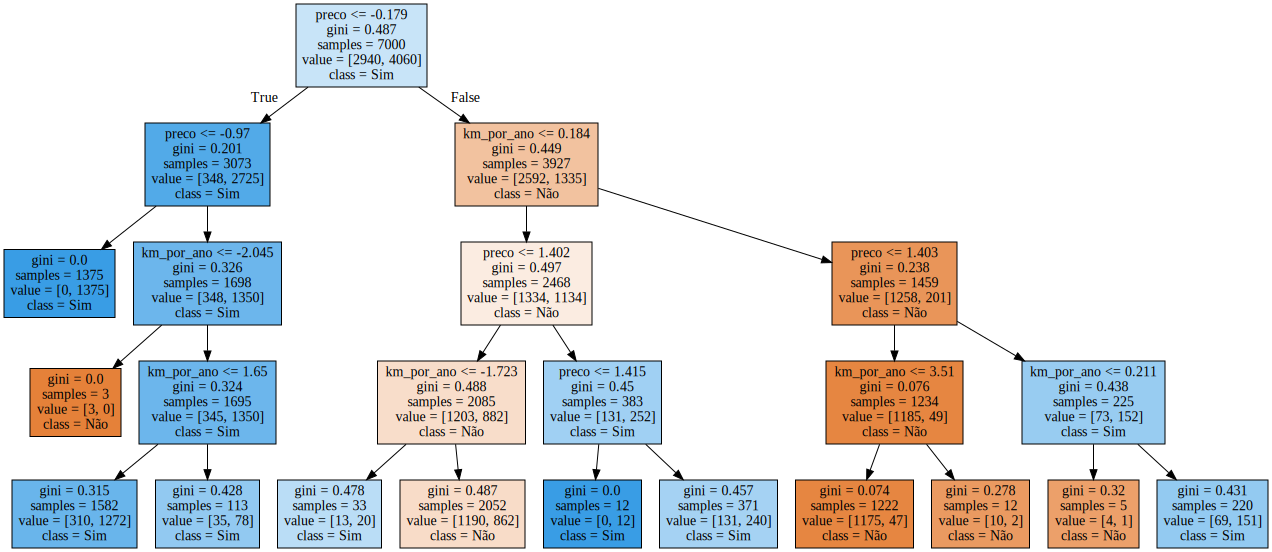

In [55]:
grafico